In [2]:
from sklearn.datasets import make_blobs
import numpy as np

nb_samples=1000
nb_unlabled=750

X,Y=make_blobs(n_samples=nb_samples,n_features=2,centers=2,cluster_std=2.5,random_state=1)

#tworzymy dane bez etykiet
unlabled_idx=np.random.choice(np.arange(0,nb_samples,1),replace=False,size=nb_unlabled)
Y[unlabled_idx]=-1

Definijuemy rozkłady Guassa poprzez określenie ich średniej kowariancji oraz wagi (macierze kowariancji muszą być dodatnio półokreślone)

In [3]:
#pierwszy rozkład
m1=np.array([-3.0,-4.5])
c1=np.array([[25.0,5.0],[5.0,35.0]])
q1=0.5

#drugi rozkład
m2=np.array([5.0,10.0])
c2=np.array([[25.0,-10.0],[-10.0,25.0]])
q2=0.5 #waga

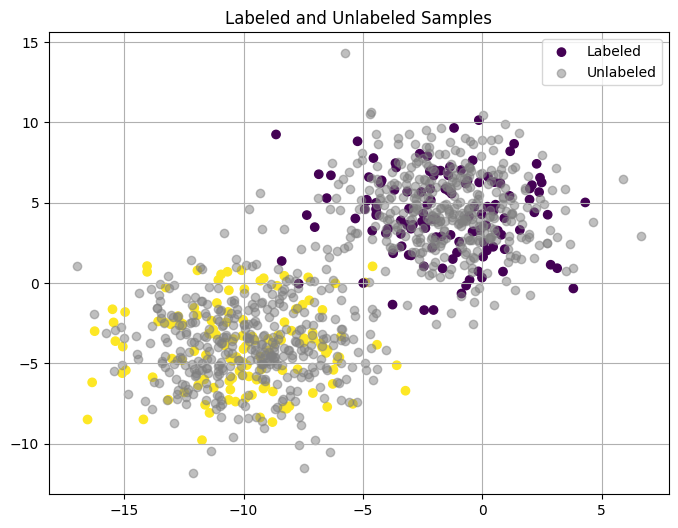

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot labeled samples
plt.scatter(X[Y != -1][:, 0], X[Y != -1][:, 1], c=Y[Y != -1], cmap='viridis', label='Labeled')

# Plot unlabeled samples
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], c='grey', alpha=0.5, label='Unlabeled')

plt.title('Labeled and Unlabeled Samples')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from scipy.stats import multivariate_normal

nb_iterations=5

for i in range(nb_iterations):
    Pij=np.zeros((nb_samples,2))
    for i in range(nb_samples):
        if Y[i]==-1: # dla danych bez etykiet
            p1=multivariate_normal.pdf(X[i],m1,c1,allow_singular=True)*q1 #prawdobodobieństwa gaussowskie
            p2=multivariate_normal.pdf(X[i],m2,c2,allow_singular=True)*q2
            Pij[i]=[p1,p2]/(p1+p2)
        else:
            Pij[i,:]=[1.0,0.0] if Y[i]==0 else [0.0,1.0]    